In [1]:
import speechpy
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa

speaker_info = {'03': ('m', 31), '08': ('f', 34), '09': ('f', 21), '10': ('m', 32), '11': ('m', 26),
                '12': ('m', 30), '13': ('f', 32), '14': ('f', 35), '15': ('m', 25), '16': ('f', 31)}
emotion_map = {'A': 'fear', 'E': 'disgust', 'W': 'anger', 'L': 'boredom', 
               'F': 'happiness', 'N': 'neutral', 'T': 'sadness'}

features = ['mfccs', 'chroma', 'mel', 'contrast', 'tonnetz']

filenames = []
path = "./EmoDB/wav"

data = []

In [59]:
def extract_features(data): 
    signal = data['signal']
    sample_rate = data['fs']
    stft = np.abs(librosa.stft(signal))
    mfccs = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(signal, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(signal),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def plot(data):
    plt.subplot(211)
    plt.plot(data)
    plt.show()
    
def plotFeatureForEmotion(data, feature, emotion):
    plt.subplot(211)
    for date in data:
        if date['emotion']==emotion:
            plt.plot(date[feature])
    plt.show()

def plotFeatureForEmotionMean(data, feature, emotion):
    values = []
    for date in data:
        if date['emotion']==emotion:
            values.append(date[feature])
    plot(np.mean(values, axis=0))

def plotFeatureMeans(data, feature, withError=False):
    values = {}
    for emotion in emotion_map.values():
        values[emotion] = []
    for date in data:
        values[date['emotion']].append(date[feature])
    plt.figure(feature, figsize=(15,10))
    plt.title(feature)
    for key in values.keys():
        mean = np.mean(values[key], axis=0)
        std = np.std(values[key], axis=0)
        x = np.arange(1, mean.size+1)
        if withError:
            plt.errorbar(x, mean, yerr=std, fmt='-o')
        else:
            plt.plot(mean)
    plt.show()

In [3]:
for file in os.listdir(path):
    if file.endswith(".wav"):
        filenames.append(file)

for name in filenames:
    signal, fs= librosa.load(path + "/" + name)
    date = {}
    date['filename'] = name
    date['signal'] = signal
    date['fs'] = fs
    date['speaker'] = speaker_info[name[:2]]
    date['sentence'] = name[2:-6]
    date['emotion'] = emotion_map[name[5:-5]]
    data.append(date)

In [4]:
for date in data:
    mfccs,chroma,mel,contrast,tonnetz = extract_features(date)
    date['mfccs'] = mfccs
    date['chroma'] = chroma
    date['mel'] = mel
    date['contrast'] = contrast
    date['tonnetz'] = tonnetz


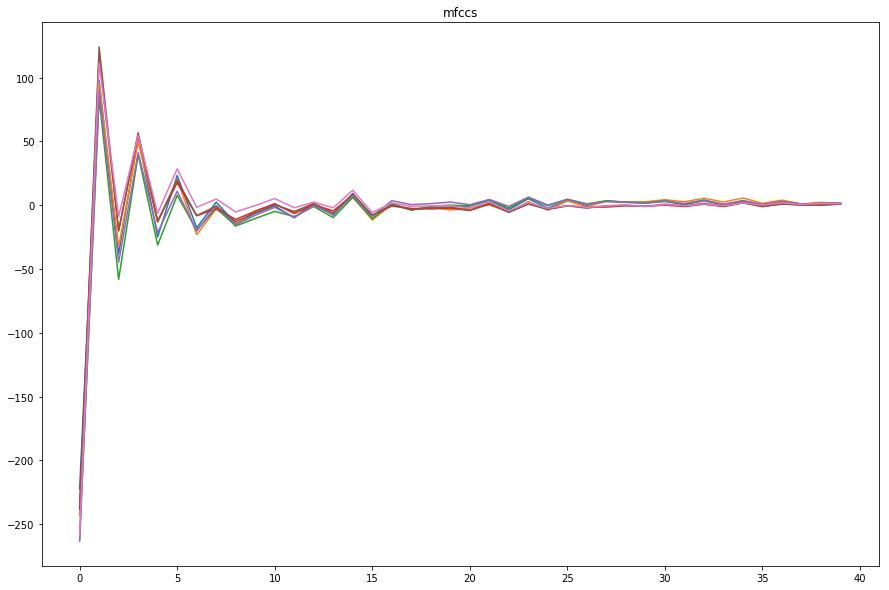

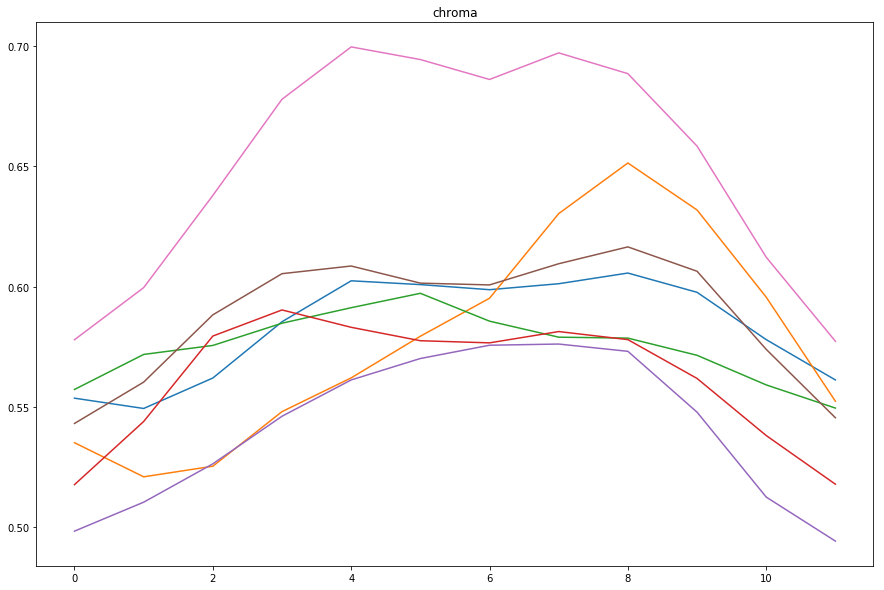

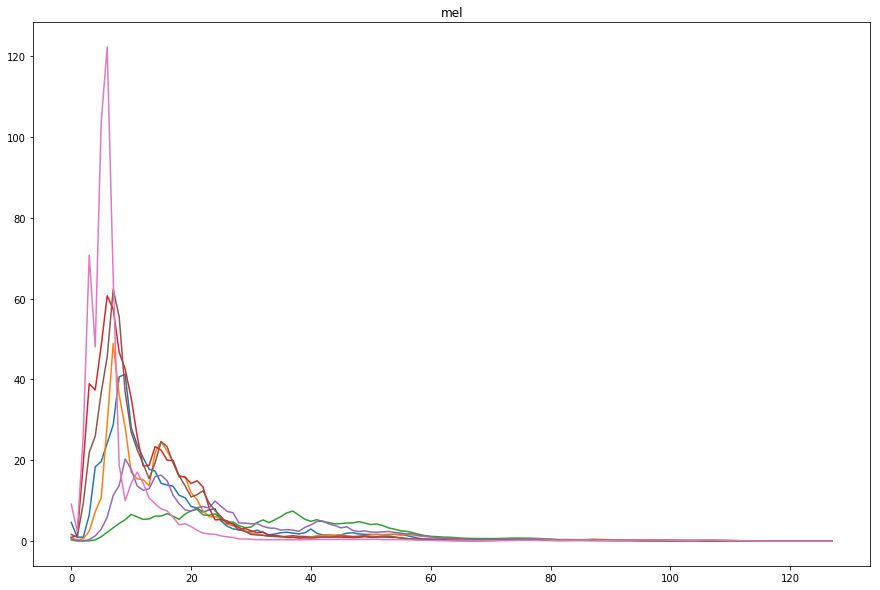

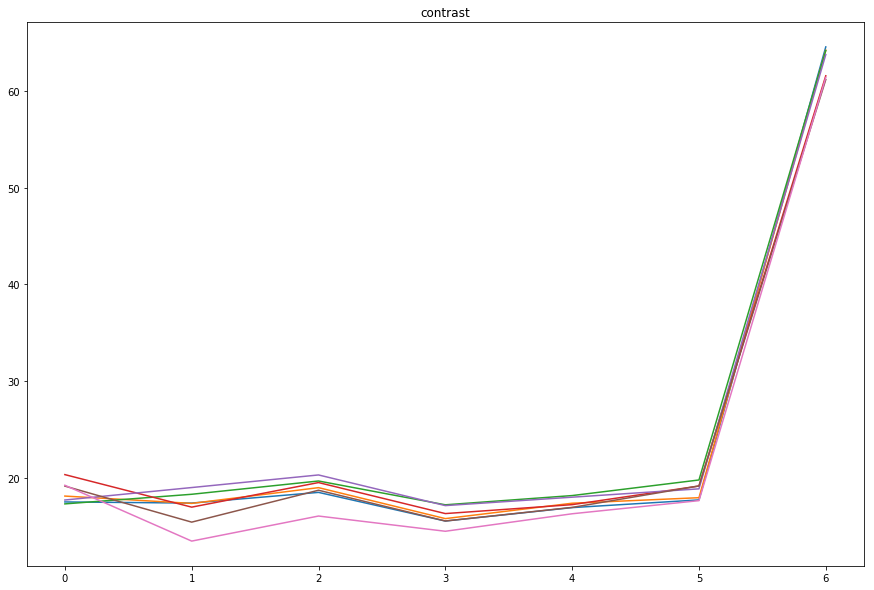

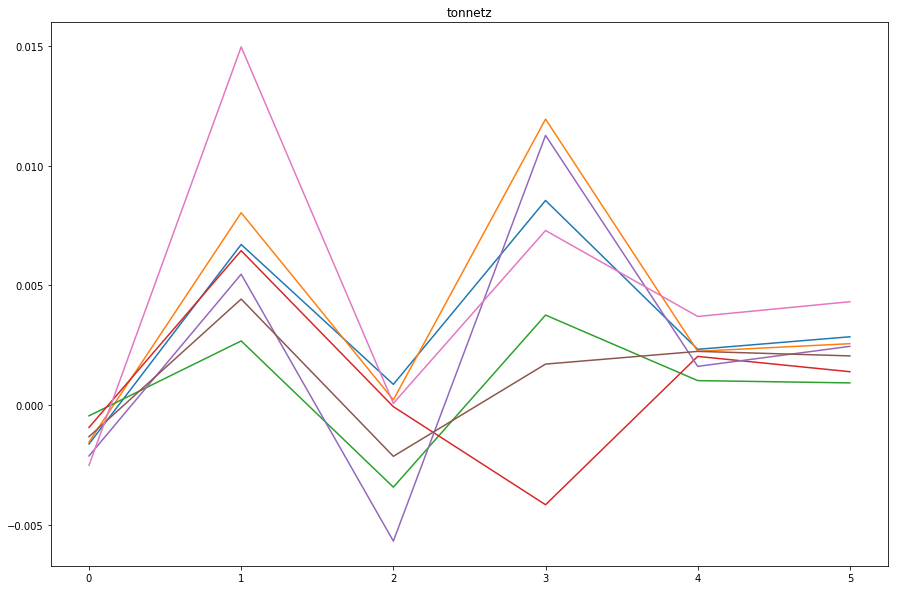

In [60]:
for feature in features:
    plotFeatureMeans(data, feature)

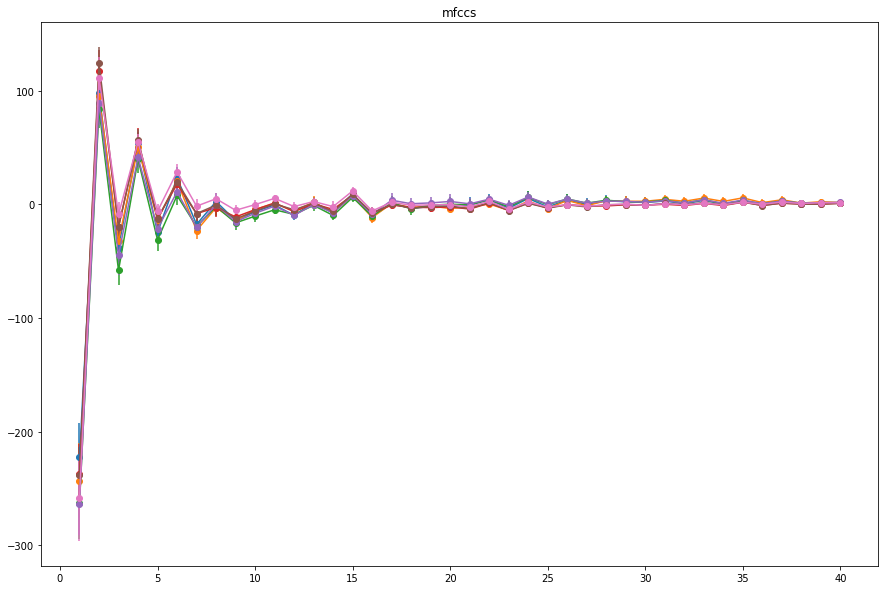

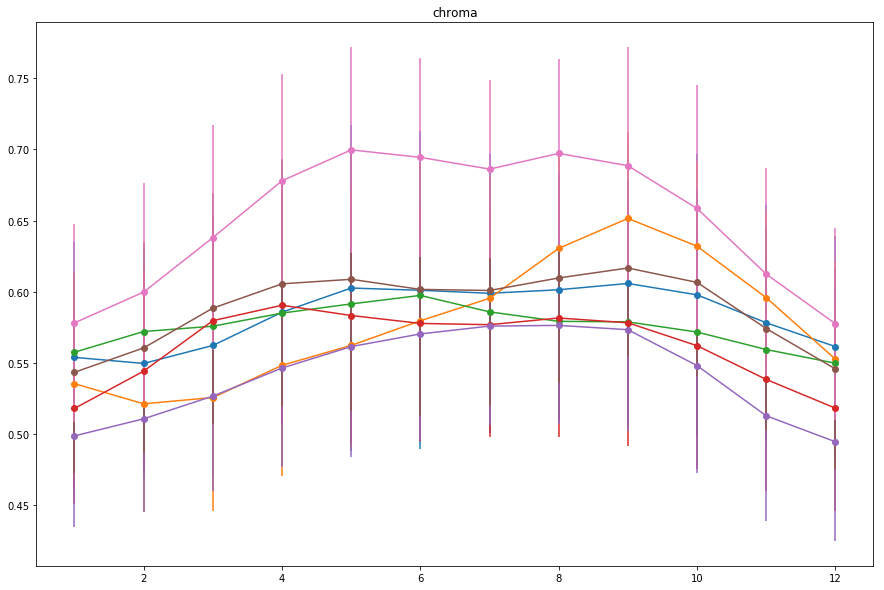

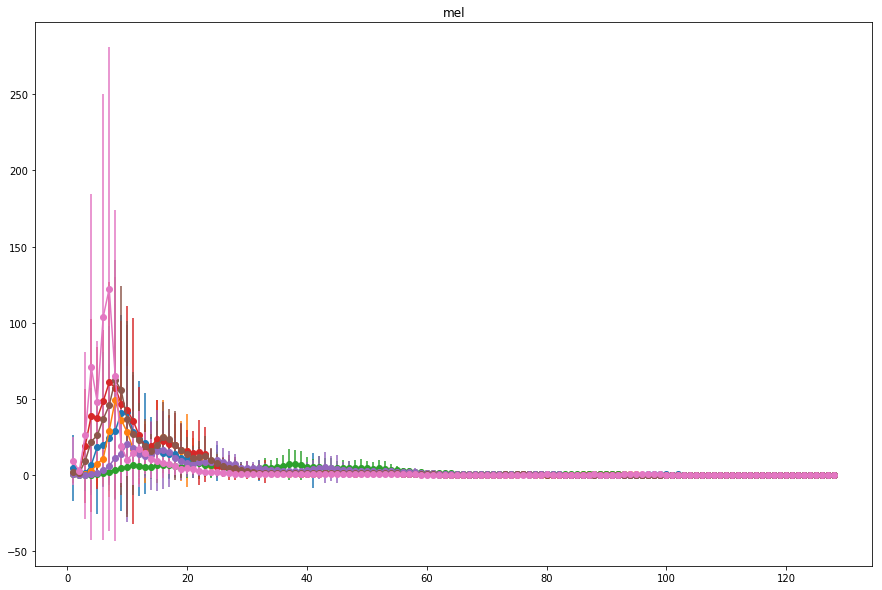

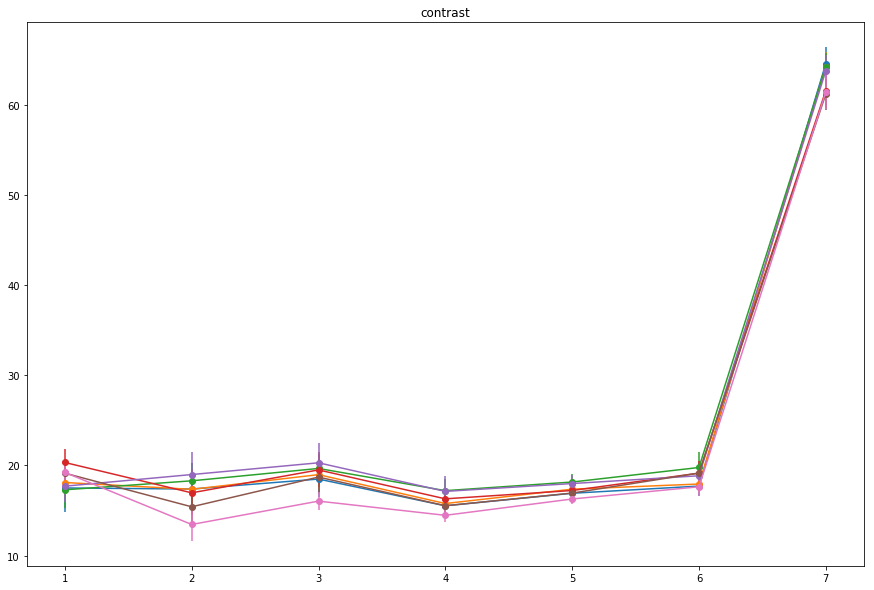

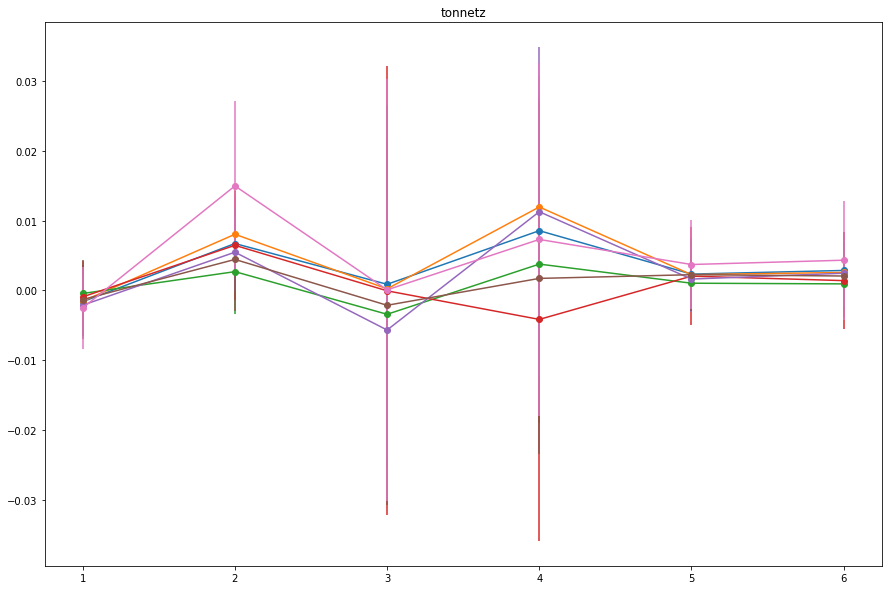

In [61]:
for feature in features:
    plotFeatureMeans(data, feature, True)